# Name - Snehal Namdeo Waghole

## CHURN DATA

***********************

In [1]:
import pandas as pd

In [2]:
ch=pd.read_csv(r"C:\Users\nehaw\Desktop\class material\codsoft projects\Churn\churn\Churn_Modelling.csv")

In [3]:
ch.shape

(10000, 14)

### CLEANING

In [4]:
ch.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
ch=ch.drop(['CustomerId'],axis=1)

In [6]:
import numpy as np

In [7]:
# ch.replace({' ':np.nan},inplace=True)      ### CONVERTING BLANK ROWS AS NULLS

In [8]:
ch.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  int32  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int32  
 4   Gender           10000 non-null  int32  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
# ch.gender.replace({'Male':0, 'Female':1},inplace=True)
# ch.Partner.replace({'No':0, 'Yes':1},inplace=True)
# ch.Dependents.replace({'No':0, 'Yes':1},inplace=True)
# ch.PhoneService.replace({'No':0, 'Yes':1},inplace=True)
# ch.MultipleLines.replace({'No':0, 'Yes':1 ,'No phone service':2},inplace=True)
# ch.OnlineSecurity.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.OnlineBackup.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.DeviceProtection.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.TechSupport.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.StreamingTV.replace({'No':0, 'Yes':1 ,'No internet service':2},inplace=True)
# ch.Contract.replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)
# ch.PaperlessBilling.replace({'No':0, 'Yes':1},inplace=True)
# ch.Churn.replace({'No':0, 'Yes':1},inplace=True)

In [11]:
ch[ch.select_dtypes(include='object').columns]=ch[ch.select_dtypes(include='object').columns].apply(le.fit_transform)

In [14]:
# ch.info()

In [15]:
# ch.head(3)

### SAMPLING

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
ch_train ,ch_test = train_test_split(ch,test_size=.2)

In [15]:
ch_train_x=ch_train.iloc[:,0:-1]
ch_test_x = ch_test.iloc[:,0:-1]

ch_train_y=ch_train.iloc[:,-1]
ch_test_y = ch_test.iloc[:,-1]

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [18]:
linreg.fit(ch_train_x,ch_train_y)

LinearRegression()

## R square

In [19]:
linreg.score(ch_train_x,ch_train_y)   ### R square

0.13903827382507294

### ADJUSTED R SQUARE

In [20]:
Rsquare = linreg.score(ch_train_x,ch_train_y) 
N=ch_train_x.shape[0]
K=ch_train_x.shape[1]

Adju_Rsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
Adju_Rsquare


0.1377447292258368

### Intercept (B0 value)

In [21]:
linreg.intercept_

-0.08388798999566469

### coefficient of x( slope i.e values of B1,B2....)

In [22]:
linreg.coef_

array([-2.41929376e-06, -9.75623205e-06, -9.35323810e-05,  1.03804516e-02,
       -8.12174804e-02,  1.13349752e-02, -1.39400175e-03,  6.78316536e-07,
       -3.04092648e-03, -3.80729774e-03, -1.46369258e-01,  8.41798044e-08])

### Predicted value of each record 

In [23]:
pred_train_log=linreg.predict(ch_train_x)
pred_test_log=linreg.predict(ch_test_x)

In [24]:
## Errors---->>> Distance betweeen Actual value and Predicted value
## Checking the Assumptions ---->> Assumptions are only on the train data

In [25]:
err_train = ch_train_y - pred_train_log
err_train

6480   -0.011607
3671   -0.366248
7885   -0.347226
8644   -0.151955
3435   -0.137974
          ...   
2458   -0.611549
8971   -0.202791
9892   -0.163724
3110    0.382601
1666    0.637320
Name: Exited, Length: 8000, dtype: float64

In [26]:
## First -- You will check mean of the error terms should always be ZERO

In [27]:
err_train.mean()

-3.537448112211905e-17

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

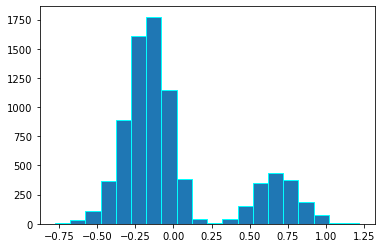

In [32]:
plt.hist(err_train,edgecolor='cyan',bins=20);

In [33]:
err_train.skew()

1.1652002660820235

In [34]:
err_train.kurtosis() + 3

3.164249603001138

### SCATTER PLOT

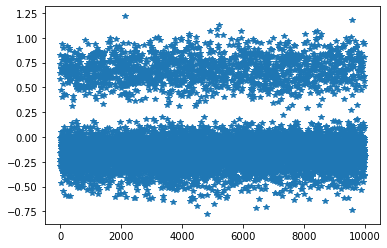

In [36]:
plt.plot(err_train,"*") # To see if erros are Random

In [38]:
pred_actual=pd.DataFrame()
pred_actual['Actual']=ch_train_y
pred_actual['Predicted']=pred_train_log


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

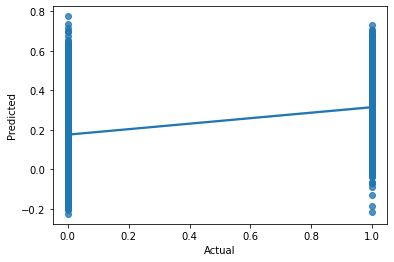

In [39]:
sns.regplot(x='Actual',y='Predicted',data=pred_actual)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression()
logreg.fit(ch_train_x,ch_train_y)

LogisticRegression()

In [42]:
pred_train =logreg.predict(ch_train_x)
pred_test = logreg.predict(ch_test_x)

### confusion_matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
mat_test=confusion_matrix(ch_test_y,pred_test)
mat_test

array([[1598,    0],
       [ 402,    0]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [46]:
accuracy_score(ch_test_y,pred_test)

0.799

In [47]:
recall_score(ch_test_y,pred_test)

0.0

In [48]:
precision_score(ch_test_y,pred_test)

C:\Users\nehaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [49]:
f1_score(ch_test_y,pred_test)

0.0

In [50]:
mat_test.diagonal().sum() / mat_test.sum()

0.799

In [51]:
pred_prob_test=logreg.predict_proba(ch_test_x)
len(pred_prob_test)

2000

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [53]:


roc_auc_score(ch_test_y,pred_prob_test[:,1] )

0.571055859625527

In [54]:
fpr, tpr,thre=roc_curve(ch_test_y,pred_prob_test[:,1] ) 

In [55]:
import matplotlib.pyplot as plt

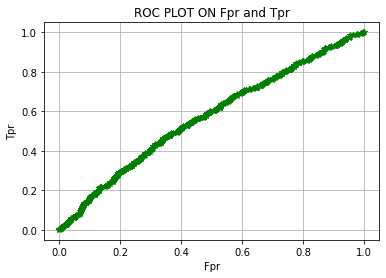

In [56]:
plt.plot(fpr,tpr, marker ='*', color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC PLOT ON Fpr and Tpr')
plt.grid()

# Decision Tree(Gini)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [58]:
dtc.fit(ch_train_x,ch_train_y)

DecisionTreeClassifier()

In [59]:
pred_train=dtc.predict(ch_train_x)
pred_test=dtc.predict(ch_test_x)

In [60]:
pred_train

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
mat_test=confusion_matrix(ch_test_y,pred_test)
mat_test

array([[1389,  209],
       [ 199,  203]], dtype=int64)

In [63]:
accuracy_score(ch_test_y,pred_test)

0.796

In [64]:
recall_score(ch_test_y,pred_test)

0.5049751243781094

In [65]:
precision_score(ch_test_y,pred_test)

0.49271844660194175

In [66]:
f1_score(ch_test_y,pred_test)

0.49877149877149873

### Feature Importance

In [67]:
feat_imp=dtc.feature_importances_
feat_imp

array([0.09642025, 0.10716339, 0.10335223, 0.02287234, 0.01146152,
       0.2060737 , 0.04708184, 0.10372353, 0.12089219, 0.0149678 ,
       0.05916162, 0.10682958])

In [68]:
df_feat_imp=pd.DataFrame()
df_feat_imp['features']=ch_train_x.columns
df_feat_imp['IMP']=dtc.feature_importances_
df_feat_imp.sort_values(by='IMP', ascending=False)

,features,IMP
5,Age,0.206074
8,NumOfProducts,0.120892
1,Surname,0.107163
11,EstimatedSalary,0.106830
7,Balance,0.103724
2,CreditScore,0.103352
0,RowNumber,0.096420
10,IsActiveMember,0.059162
6,Tenure,0.047082
3,Geography,0.022872


In [69]:
a=list(feat_imp)
b=list(ch_train_x.columns)
c=list(zip(a,b))
c.sort(reverse=True)
#print(c)
df2=pd.DataFrame(c)
df2.columns=['values','imp']
df2

,values,imp
0,0.206074,Age
1,0.120892,NumOfProducts
2,0.107163,Surname
3,0.106830,EstimatedSalary
4,0.103724,Balance
5,0.103352,CreditScore
6,0.096420,RowNumber
7,0.059162,IsActiveMember
8,0.047082,Tenure
9,0.022872,Geography


# Decision_Tree_Entropy

In [70]:
dtc1=DecisionTreeClassifier(criterion='entropy')
dtc1.fit(ch_train_x,ch_train_y)

DecisionTreeClassifier(criterion='entropy')

In [71]:
pred_test2=dtc1.predict(ch_test_x)
pred_train2=dtc1.predict(ch_train_x)

In [72]:
confusion_matrix(ch_test_y,pred_test2)

array([[1379,  219],
       [ 198,  204]], dtype=int64)

In [73]:
accuracy_score(ch_test_y,pred_test2)

0.7915

In [74]:
f1_score(ch_test_y,pred_test2)

0.4945454545454546

In [75]:
recall_score(ch_test_y,pred_test2)

0.5074626865671642

In [76]:
precision_score(ch_test_y,pred_test2)

0.48226950354609927

# Tree

In [76]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 
import pydot
from six import StringIO

In [77]:
# dot_data = StringIO()

# import matplotlib.pyplot as plt
# fig= plt.figure(figsize=(12,12))

# export_graphviz(dtc1 , out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True , feature_names=ch_train_x.columns  )
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())


# GRID SEARCH

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
search_disct= {"criterion" : ["gini","entropy"],
                "max_depth" : range(4,9),
                "min_samples_split":[50,75,100]}

In [80]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt,param_grid=search_disct)

In [81]:
grid.fit(ch_train_x,ch_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100]})

#### Gives a best combination

In [82]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 100}

In [83]:
grid.predict(ch_test_x)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')


In [85]:
rfc.fit(ch_train_x,ch_train_y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [86]:
pred_rfc_ch =rfc.predict(ch_test_x)

In [87]:
tab_rfc_ch=confusion_matrix(ch_test_y,pred_rfc_ch)
tab_rfc_ch

array([[931, 100],
       [188, 190]], dtype=int64)

In [88]:
tab_rfc_ch.diagonal().sum()/tab_rfc_ch.sum()*100

79.55997161107167

In [1]:


# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
 
# fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ax[0, 0].set_title("Test_Matrix_Logistic" ,  color ='red') 
# ax[0, 1].set_title("Train_Matrix_Logistic"  )
# ax[1,0].set_title("Test_Matrix-DT")
# ax[1,1].set_title("Train_Matrix-DT")

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_test_y , pred_test_log), display_labels=["Rej", 'App']).plot(ax=ax[0][0])

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_train_y, pred_train_log), display_labels=['Rej', 'App']).plot(ax=ax[0][1])

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_test_y, pred_test ), display_labels=['Rej', 'App']).plot(ax=ax[1][0])

# ConfusionMatrixDisplay(
#     confusion_matrix=confusion_matrix(  ch_train_y, pred_train), display_labels=['Rej', 'App']).plot(ax=ax[1][1])